In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
with open("streaming_experiments/remind_imagenet/accuracies_min_trained_0_max_trained_1000.json", "r") as read_file:
    data = json.load(read_file)
print(data)

{'base_classes_top1': [12.0, 30.0, 22.0, 20.0, 24.0, 18.0, 18.0, 20.0, 20.0, 12.0], 'non_base_classes_top1': [68.18000030517578, 61.07999801635742, 57.0533332824707, 52.314998626708984, 51.41200256347656, 49.75666809082031, 47.394287109375, 46.48749923706055, 45.2400016784668], 'seen_classes_top1': [12.0, 54.959999084472656, 52.173336029052734, 50.73500061035156, 47.52800369262695, 46.86333465576172, 45.691429138183594, 44.3125, 43.96889114379883, 42.85600280761719], 'base_classes_top5': [28.0, 52.0, 56.0, 36.0, 34.0, 30.0, 28.0, 32.0, 34.0, 30.0], 'non_base_classes_top5': [88.68000030517578, 83.91999816894531, 79.66000366210938, 76.59500122070312, 75.69600677490234, 74.66667175292969, 72.65714263916016, 71.5, 70.3822250366211], 'seen_classes_top5': [28.0, 79.1500015258789, 76.3800048828125, 73.98999786376953, 72.30000305175781, 71.34333801269531, 70.63428497314453, 69.61249542236328, 69.05110931396484, 68.03600311279297], '0_base_class_top1': [8.0, 18.0, 22.0, 12.0, 12.0, 4.0, 10.0, 1

In [34]:
seen_top1 = data['seen_classes_top1'][1:]
seen_top5 = data['seen_classes_top5'][1:]
# Make dfs of base class accuracies over course of training
num_classes_trained = list(range(100, 1100, 100))
top1 = pd.DataFrame(index=num_classes_trained)
top5 = pd.DataFrame(index=num_classes_trained)
for label in data:
    try:
        int(label[0]) # Get only base classes, which start with numbers
        label_split = label.split("_")
        col_name = label_split[0]
        if label[-1] == "1":
            top1[col_name] = data[label]
        else:
            top5[col_name] = data[label]
    except:
        pass

top1['avg'] = top1.mean(axis=1)
top1['std'] = top1.std(axis=1)
top5['avg'] = top5.mean(axis=1)
top5['std'] = top5.std(axis=1)

In [32]:
top1

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,avg,std
100,8.0,14.0,18.0,26.0,2.0,28.0,26.0,6.0,32.0,14.0,...,12.0,14.0,2.0,34.0,10.0,0.0,2.0,12.0,17.70,11.229871
200,18.0,32.0,26.0,34.0,30.0,22.0,74.0,56.0,46.0,36.0,...,64.0,60.0,52.0,24.0,74.0,82.0,60.0,30.0,41.74,18.145313
300,22.0,10.0,22.0,38.0,26.0,18.0,60.0,34.0,40.0,30.0,...,56.0,54.0,54.0,18.0,48.0,80.0,42.0,22.0,34.36,17.498297
400,12.0,10.0,22.0,32.0,30.0,10.0,60.0,34.0,42.0,24.0,...,50.0,42.0,42.0,12.0,46.0,76.0,42.0,20.0,31.78,18.386723
500,12.0,12.0,30.0,30.0,28.0,16.0,54.0,42.0,26.0,22.0,...,50.0,40.0,46.0,8.0,42.0,58.0,32.0,24.0,28.38,17.556070
600,4.0,6.0,16.0,18.0,14.0,14.0,46.0,38.0,24.0,26.0,...,52.0,38.0,36.0,12.0,44.0,58.0,34.0,18.0,24.12,16.844750
700,10.0,12.0,12.0,18.0,6.0,2.0,46.0,36.0,26.0,26.0,...,42.0,26.0,28.0,14.0,38.0,54.0,24.0,18.0,21.30,15.371077
800,14.0,6.0,18.0,16.0,22.0,6.0,54.0,34.0,20.0,14.0,...,46.0,28.0,46.0,16.0,40.0,48.0,20.0,20.0,22.74,16.108768
900,16.0,6.0,28.0,18.0,22.0,8.0,42.0,34.0,20.0,30.0,...,60.0,42.0,46.0,12.0,36.0,58.0,34.0,20.0,23.80,16.503333
1000,14.0,10.0,24.0,14.0,16.0,10.0,54.0,24.0,14.0,18.0,...,46.0,22.0,42.0,12.0,36.0,54.0,28.0,12.0,21.40,15.477726


In [33]:
top5

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,avg,std
100,20.0,30.0,30.0,46.0,22.0,36.0,54.0,28.0,58.0,34.0,...,20.0,26.0,16.0,66.0,32.0,4.0,10.0,28.0,36.42,17.332732
200,42.0,58.0,80.0,48.0,58.0,48.0,86.0,72.0,70.0,64.0,...,84.0,76.0,70.0,42.0,88.0,86.0,86.0,52.0,69.62,14.677043
300,34.0,40.0,64.0,44.0,52.0,38.0,78.0,62.0,66.0,48.0,...,78.0,72.0,72.0,38.0,70.0,84.0,72.0,56.0,61.30,16.454483
400,28.0,38.0,50.0,40.0,44.0,40.0,80.0,64.0,64.0,48.0,...,74.0,64.0,58.0,34.0,72.0,86.0,64.0,36.0,56.98,16.905609
500,32.0,52.0,58.0,40.0,50.0,38.0,72.0,62.0,48.0,46.0,...,72.0,62.0,62.0,24.0,70.0,82.0,66.0,34.0,55.12,16.968960
600,24.0,34.0,48.0,38.0,38.0,40.0,62.0,54.0,46.0,48.0,...,68.0,56.0,60.0,22.0,66.0,82.0,62.0,30.0,49.58,16.800702
700,22.0,34.0,34.0,36.0,32.0,22.0,68.0,54.0,38.0,40.0,...,64.0,50.0,60.0,24.0,58.0,80.0,56.0,28.0,46.44,17.363364
800,24.0,36.0,48.0,36.0,32.0,30.0,68.0,62.0,42.0,34.0,...,72.0,60.0,60.0,32.0,58.0,76.0,52.0,32.0,48.30,17.441044
900,30.0,48.0,54.0,40.0,42.0,28.0,66.0,58.0,36.0,42.0,...,78.0,62.0,62.0,22.0,66.0,78.0,60.0,34.0,49.46,18.156773
1000,28.0,42.0,54.0,32.0,36.0,28.0,80.0,48.0,36.0,40.0,...,66.0,50.0,60.0,24.0,56.0,80.0,54.0,30.0,46.92,18.285338


In [49]:
top5["1"]

100     30.0
200     58.0
300     40.0
400     38.0
500     52.0
600     34.0
700     34.0
800     36.0
900     48.0
1000    42.0
Name: 1, dtype: float64

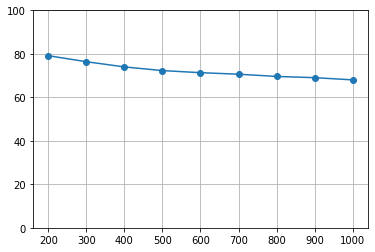

In [45]:
plt.plot(num_classes_trained[1:], seen_top5, 'o-')
plt.ylim([0, 100])
plt.grid()
plt.show()

<Figure size 432x288 with 0 Axes>

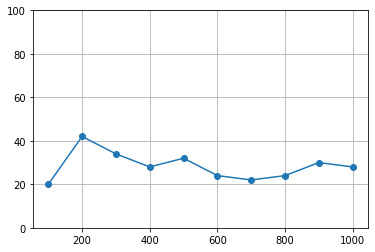

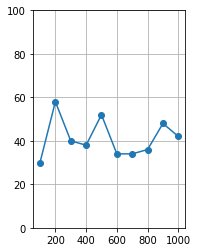

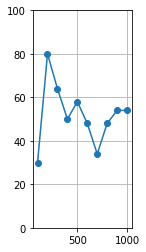

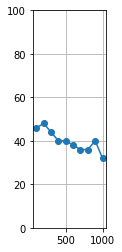

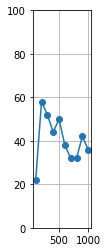

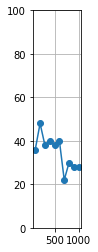

In [55]:
fig, axes = plt.subplots(0, 5)
for i in range(6):
#     axes[0, 0]= plot(0, )
    fig = plt.figure()
    plt.subplot(1, i+1, i+1)
    plt.plot(num_classes_trained, top5[str(i)], 'o-')
    plt.ylim([0, 100])
    plt.grid()
    
plt.show()